▶ **Multi-layer Perceptron Classifier (MLPClassifier)** - MLP também pode ser usado para resolver problemas de classificação. Para este exemplo foi utilizado o conjunto de dados Iris com todas as classes possíveis, da plataforma “Kaggle” (https://www.kaggle.com/datasets/uciml/iris)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPClassifier # Biblioteca para utilização do classificador MLP
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Biblioteca utilizada para normalização dos dados
from sklearn.model_selection import learning_curve # Biblioteca para avaliar um modelo por meio da curva de aprendizagem baseado no tamanho o conjunto de dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, precision_score, confusion_matrix, classification_report # Biblioteca para avaliação de métricas da execução do classificador
from sklearn import metrics
import seaborn as sns # é uma biblioteca baseada no Matplotlib, que oferece uma interface de alto nível para criação de gráficos estatísticos
import matplotlib.pyplot as plt # Para visualizacao dos dados e do erro
import numpy as np # Biblioteca de manipulação de arrays Numpy
from numpy import mean, std
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
from google.colab import drive # Biblioteca para interação do colab com o drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


▶ **Carregamento e Organização Inicial do Dataset**

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df_train = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/bebidas.csv")
df_test = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/bebidasTestes.csv")

# Renumera os índices de 1 a N ao invés de 0 a N-1
df_train.index = df_train.index + 1
df_test.index = df_test.index + 1

y_train = df_train[['d1', 'd2', 'd3']]
X_train = df_train.drop(['d1', 'd2', 'd3'], axis=1)
y_test = df_test[['d1', 'd2', 'd3']]
X_test = df_test.drop(['d1', 'd2', 'd3'], axis=1)

▶ **Mapa de correlação entre as variáveis do dataset**

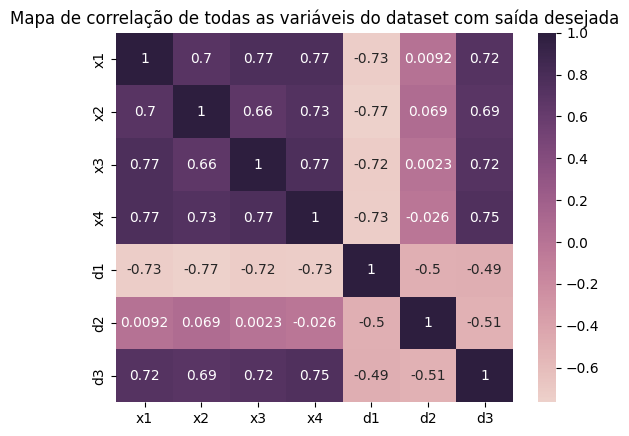

In [ ]:
# Gera um gráfico matricial para apresentar a correção entre as variáveis de entrada do dataset
ax = sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Mapa de correlação de todas as variáveis do dataset com saída desejada')
ax=ax

▶ **Pré-Processamento dos Dados**

In [ ]:
# Padronização de dados (https://sigmoidal.ai/guia-basico-de-pre-processamento-de-dados/ - https://cursos.alura.com.br/forum/topico-sobre-o-standardscaler-184181)
Xcv = X_train # Guardar o X original para usar nos testes de validação cruzada

# Normalização desnecessária, pois o dataset já está normalizado
# scaler = MinMaxScaler().fit(X_train) # Cria o modelo para o ajuste
# X_train = scaler.transform(X_train) # Aplica a padronização no dataset de treinamento baseado nos dados de treinamento

▶ **Aplicação do MLPClassifier** (
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

# Treinamento #1: 5 neurônios na camada oculta

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', max_iter=5000, epsilon=1e-6, learning_rate='constant', learning_rate_init=0.001)
mlp.fit(X_train, y_train)

print("Número de saídas da RNA: ", mlp.n_outputs_)
print("Função de ativação da camada de saída da RNA: ", mlp.out_activation_)

Número de saídas da RNA:  3
Função de ativação da camada de saída da RNA:  logistic


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Obtém as predições em forma sequencial
y_pred = mlp.predict(X_test)

# Transforma y_pred em dataframa para obter os rótulos (para conseguir usar o balanced_accuracy_score, confusion_matrix, etc.)
y_pred = pd.DataFrame(data=y_pred, index=range(1, len(y_pred) + 1), columns=['d1', 'd2', 'd3'])

In [ ]:
# Define função para obter os rótulos
def returnLabels(df):
  labels = []
  for row in df.itertuples():
      if row.d1 == 1:
        labels.append('d1')
      elif row.d2 == 1:
        labels.append('d2')
      else:
        labels.append('d3')
  return labels

In [ ]:
# Obtêm-se os rótulos
y_pred_labels = returnLabels(y_pred)
y_test_labels = returnLabels(y_test)

▶ **Avaliação do Modelo considerando um percentual fixo de amostras para treinamentos e outro para validação**


MÉTRICAS DA CLASSIFICAÇÃO
Acurácia das amostras na classificação não apresentadas no treinamento: 1.0
Acurácia balanceada na classificação das amostras não apresentadas no treinamento: 1.0
Matriz de confusão das amostras não apresentadas no treinamento:
 [[6 0 0]
 [0 5 0]
 [0 0 7]]

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

          d1       1.00      1.00      1.00         6
          d2       1.00      1.00      1.00         5
          d3       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18
 samples avg       1.00      1.00      1.00        18



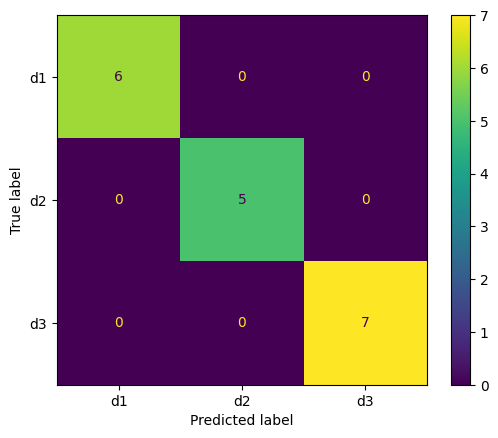

In [ ]:
print("\nMÉTRICAS DA CLASSIFICAÇÃO")
# Todas as métricas do sklearn.metrics para classificação https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
print(f"Acurácia das amostras na classificação não apresentadas no treinamento: {accuracy_score(y_test, y_pred)}")
# Utiliza os rótulos ao invés das amostras sequenciais para calcular a acurácia balanceada
print(f"Acurácia balanceada na classificação das amostras não apresentadas no treinamento: {balanced_accuracy_score(y_test_labels, y_pred_labels)}")
# Idem matriz de confusão
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test_labels, y_pred_labels)}")

print("")

relatorio = classification_report(y_test, y_pred, target_names=['d1', 'd2', 'd3'])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['d1', 'd2', 'd3'])
cm_display.plot()
plt.show()

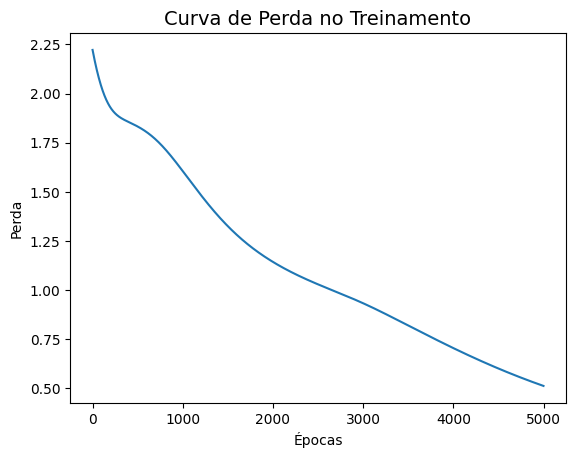

In [ ]:
# Plotando o gráfico de erros no processo de treinamento
plt.plot(mlp.loss_curve_)
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()

In [ ]:
print("\nMÉTRICAS DO TREINAMENTO")

print("Melhor loss do treinamento: ", mlp.best_loss_) # best_loss_ fornece o melhor valor de perda durante o treinamento
print("Último valor do loss para convergência: ", mlp.loss_) # loss_ fornece o último valor de perda do treinamento
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(y_test, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.


MÉTRICAS DO TREINAMENTO
Melhor loss do treinamento:  0.5118469012361533
Último valor do loss para convergência:  0.5118469012361533
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0
R2:  1.0


# Treinamento #2: 10 neurônios na camada oculta

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10), activation='logistic', max_iter=5000, epsilon=1e-6, learning_rate='constant', learning_rate_init=0.001)
mlp.fit(X_train, y_train)

print("Número de saídas da RNA: ", mlp.n_outputs_)
print("Função de ativação da camada de saída da RNA: ", mlp.out_activation_)

Número de saídas da RNA:  3
Função de ativação da camada de saída da RNA:  logistic


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Obtém as predições em forma sequencial
y_pred = mlp.predict(X_test)

# Transforma y_pred em dataframa para obter os rótulos (para conseguir usar o balanced_accuracy_score, confusion_matrix, etc.)
y_pred = pd.DataFrame(data=y_pred, index=range(1, len(y_pred) + 1), columns=['d1', 'd2', 'd3'])

In [ ]:
# Obtêm-se os rótulos
y_pred_labels = returnLabels(y_pred)
y_test_labels = returnLabels(y_test)

▶ **Avaliação do Modelo considerando um percentual fixo de amostras para treinamentos e outro para validação**


MÉTRICAS DA CLASSIFICAÇÃO
Acurácia das amostras na classificação não apresentadas no treinamento: 1.0
Acurácia balanceada na classificação das amostras não apresentadas no treinamento: 1.0
Matriz de confusão das amostras não apresentadas no treinamento:
 [[6 0 0]
 [0 5 0]
 [0 0 7]]

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

          d1       1.00      1.00      1.00         6
          d2       1.00      1.00      1.00         5
          d3       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18
 samples avg       1.00      1.00      1.00        18



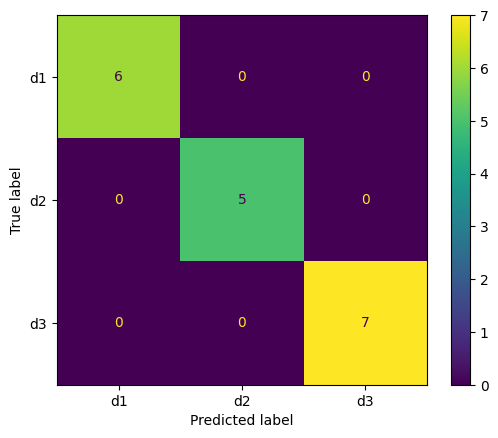

In [ ]:
print("\nMÉTRICAS DA CLASSIFICAÇÃO")
# Todas as métricas do sklearn.metrics para classificação https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
print(f"Acurácia das amostras na classificação não apresentadas no treinamento: {accuracy_score(y_test, y_pred)}")
# Utiliza os rótulos ao invés das amostras sequenciais para calcular a acurácia balanceada
print(f"Acurácia balanceada na classificação das amostras não apresentadas no treinamento: {balanced_accuracy_score(y_test_labels, y_pred_labels)}")
# Idem matriz de confusão
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test_labels, y_pred_labels)}")

print("")

relatorio = classification_report(y_test, y_pred, target_names=['d1', 'd2', 'd3'])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['d1', 'd2', 'd3'])
cm_display.plot()
plt.show()

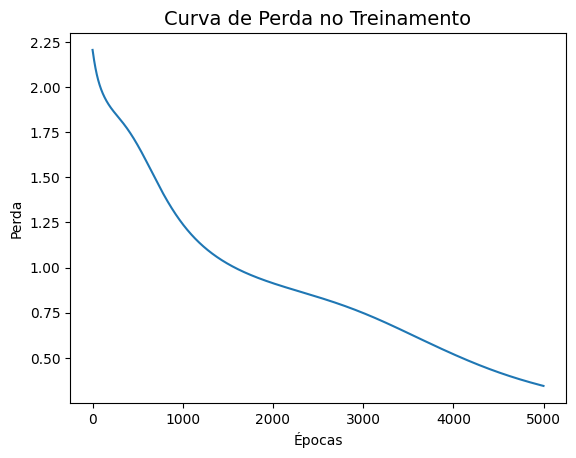

In [ ]:
# Plotando o gráfico de erros no processo de treinamento
plt.plot(mlp.loss_curve_)
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()

In [ ]:
print("\nMÉTRICAS DO TREINAMENTO")

print("Melhor loss do treinamento: ", mlp.best_loss_) # best_loss_ fornece o melhor valor de perda durante o treinamento
print("Último valor do loss para convergência: ", mlp.loss_) # loss_ fornece o último valor de perda do treinamento
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(y_test, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.


MÉTRICAS DO TREINAMENTO
Melhor loss do treinamento:  0.34508538156587343
Último valor do loss para convergência:  0.34508538156587343
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0
R2:  1.0


# Treinamento #3: 15 neurônios na camada oculta

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(15), activation='logistic', max_iter=5000, epsilon=1e-6, learning_rate='constant', learning_rate_init=0.001)
mlp.fit(X_train, y_train)

print("Número de saídas da RNA: ", mlp.n_outputs_)
print("Função de ativação da camada de saída da RNA: ", mlp.out_activation_)

Número de saídas da RNA:  3
Função de ativação da camada de saída da RNA:  logistic


In [ ]:
# Obtém as predições em forma sequencial
y_pred = mlp.predict(X_test)

# Transforma y_pred em dataframa para obter os rótulos (para conseguir usar o balanced_accuracy_score, confusion_matrix, etc.)
y_pred = pd.DataFrame(data=y_pred, index=range(1, len(y_pred) + 1), columns=['d1', 'd2', 'd3'])

In [ ]:
# Obtêm-se os rótulos
y_pred_labels = returnLabels(y_pred)
y_test_labels = returnLabels(y_test)

▶ **Avaliação do Modelo considerando um percentual fixo de amostras para treinamentos e outro para validação**


MÉTRICAS DA CLASSIFICAÇÃO
Acurácia das amostras na classificação não apresentadas no treinamento: 1.0
Acurácia balanceada na classificação das amostras não apresentadas no treinamento: 1.0
Matriz de confusão das amostras não apresentadas no treinamento:
 [[6 0 0]
 [0 5 0]
 [0 0 7]]

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

          d1       1.00      1.00      1.00         6
          d2       1.00      1.00      1.00         5
          d3       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18
 samples avg       1.00      1.00      1.00        18



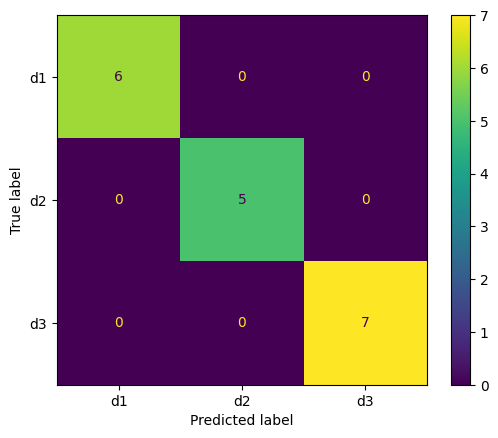

In [ ]:
print("\nMÉTRICAS DA CLASSIFICAÇÃO")
# Todas as métricas do sklearn.metrics para classificação https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
print(f"Acurácia das amostras na classificação não apresentadas no treinamento: {accuracy_score(y_test, y_pred)}")
# Utiliza os rótulos ao invés das amostras sequenciais para calcular a acurácia balanceada
print(f"Acurácia balanceada na classificação das amostras não apresentadas no treinamento: {balanced_accuracy_score(y_test_labels, y_pred_labels)}")
# Idem matriz de confusão
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test_labels, y_pred_labels)}")

print("")

relatorio = classification_report(y_test, y_pred, target_names=['d1', 'd2', 'd3'])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['d1', 'd2', 'd3'])
cm_display.plot()
plt.show()

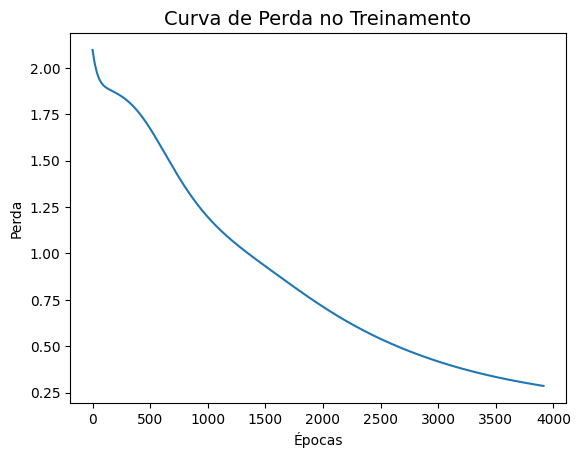

In [ ]:
# Plotando o gráfico de erros no processo de treinamento
plt.plot(mlp.loss_curve_)
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()

In [ ]:
print("\nMÉTRICAS DO TREINAMENTO")

print("Melhor loss do treinamento: ", mlp.best_loss_) # best_loss_ fornece o melhor valor de perda durante o treinamento
print("Último valor do loss para convergência: ", mlp.loss_) # loss_ fornece o último valor de perda do treinamento
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(y_test, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.


MÉTRICAS DO TREINAMENTO
Melhor loss do treinamento:  0.28634095374878393
Último valor do loss para convergência:  0.28634095374878393
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0
R2:  1.0
